In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import math

In [19]:
prior_rand = 0.8 #np.random.uniform(0.3,0.7)
Prior_prob = np.array([prior_rand,1-prior_rand])
print(Prior_prob)

[0.8 0.2]


In [20]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))


In [21]:
mean1 = np.array([-0.1, 0])
cov1 = np.array([[1, -0.9], [-0.9, 1]])

mean2 = np.array([0.1, 0])
cov2 = np.array([[1, 0.9], [0.9, 1]])

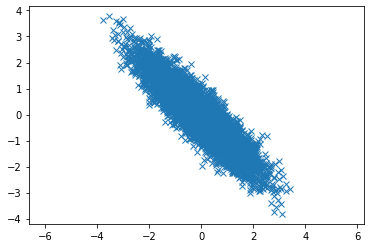

In [41]:
x1, y1 = np.random.multivariate_normal(mean1, cov1,10000).T
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()
#print(x1,y1)

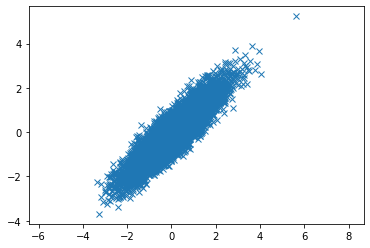

In [23]:
x2, y2 = np.random.multivariate_normal(mean2, cov2, 10000).T
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

In [24]:
class0_samples = []
class1_samples = []

for i in range(10000):
    temp1 = np.random.uniform(0,1)
    if temp1 <= Prior_prob[0]:
        sample = np.random.multivariate_normal(mean1,cov1,1).T
        class0_samples.append(sample)
    else:
        sample = np.random.multivariate_normal(mean2,cov2,1).T
        class1_samples.append(sample) 
class0_final = np.array(class0_samples)
class1_final = np.array(class1_samples)
print(np.shape(class0_final),np.shape(class1_final))
lable_0 = np.zeros((np.shape(class0_final)[0],1))
lable_1 = np.ones((np.shape(class1_final)[0],1))
lable = np.vstack((lable_0,lable_1))
class_final = np.vstack((class0_final[:,:,0],class1_final[:,:,0]))
print(np.shape(lable))
print(np.shape(class_final))

(8054, 2, 1) (1946, 2, 1)
(10000, 1)
(10000, 2)


In [25]:
print(np.shape(np.shape(class0_final)),np.shape(class1_final))

(3,) (1946, 2, 1)


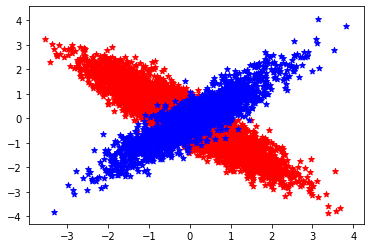

-3.3283519733261095


In [26]:
plt.scatter(class0_final[:,0,0],class0_final[:,1,0],marker='*',color='red')
plt.scatter(class1_final[:,0,0],class1_final[:,1,0],marker='*',color='blue')
plt.show()
print(min(class1_final[:,0,0]))

## Expected risk minimization 

In [207]:
same_class_loss = np.random.uniform(0,0.2,2)
diff_class_loss = np.random.uniform(0.9,1.2,2)

lmb = np.array([[same_class_loss[0],diff_class_loss[0]],[diff_class_loss[1],same_class_loss[1]]])

gamma = math.log(((lmb[1,0]-lmb[0,0])/(lmb[0,1]-lmb[1,1]) * Prior_prob[0]/Prior_prob[1]),2)

In [208]:
#PREDICTION
classify_0 = []
classify_1 = []

for i in class0_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    left_side = math.log(pred1)-math.log(pred0)
    if (left_side >gamma):
        classify_0.append(1)
    else:
        classify_0.append(0)
        
for i in class1_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    left_side = math.log(pred1)-math.log(pred0)
    if (left_side >gamma):
        classify_1.append(1)
    else:
        classify_1.append(0)
        
        
classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
classify = np.vstack((classify_0,classify_1))
print(np.shape(classify))

(10000, 1)


In [209]:
df = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})

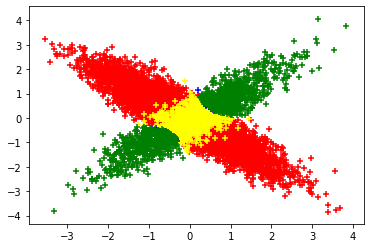

In [210]:
ind00 = np.where((df['label']==0) & (df['classify']==0))
plt.scatter(df.loc[ind00]['x'],df.loc[ind00]['y'], marker='+',color = 'red')
ind10 = np.where((df['label']==0) & (df['classify']==1))
ind01 = np.where((df['label']==1) & (df['classify']==0))
plt.scatter(df.loc[ind01]['x'],df.loc[ind01]['y'], marker='+',color = 'yellow')
plt.scatter(df.loc[ind10]['x'],df.loc[ind10]['y'], marker='+',color = 'blue')
ind11 = np.where((df['label']==1) & (df['classify']==1))
plt.scatter(df.loc[ind11]['x'],df.loc[ind11]['y'], marker='+',color = 'green')
plt.show()

In [211]:
#Setting probabilities
p00 = (np.shape(ind00)[1])/(np.shape(class0_final)[0])
p10 = (np.shape(ind10)[1])/(np.shape(class0_final)[0])
p01 = (np.shape(ind01)[1])/(np.shape(class1_final)[0])
p11 = (np.shape(ind11)[1])/(np.shape(class1_final)[0])

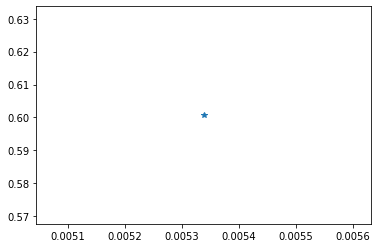

In [212]:
plt.plot(p10,p11,marker='*')

### Variing gamma

In [213]:

temp = 1
FPR = []
TPR = []
red = 0.05
#FPR.append(0)
#TPR.append(0)
min_prob_of_error = []
while (temp>0):
    gamma = math.log(temp)
    print('Gamma:',gamma, 'Temp',temp)
    classify_0 = []
    classify_1 = []

    for i in class0_final:
        pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
        pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
        left_side = math.log(pred1)-math.log(pred0)
        if (left_side >gamma):
            classify_0.append(1)
        else:
            classify_0.append(0)
        
    for i in class1_final:
        pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
        pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
        left_side = math.log(pred1)-math.log(pred0)
        if (left_side >gamma):
            classify_1.append(1)
        else:
            classify_1.append(0)
        
        
    classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
    classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
    classify = np.vstack((classify_0,classify_1))
    
    df = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})
    
    ind00 = np.where((df['label']==0) & (df['classify']==0))
    #plt.scatter(df.loc[ind00]['x'],df.loc[ind00]['y'], marker='+',color = 'red')
    ind10 = np.where((df['label']==0) & (df['classify']==1))
    #plt.scatter(df.loc[ind01]['x'],df.loc[ind01]['y'], marker='+',color = 'yellow')
    ind01 = np.where((df['label']==1) & (df['classify']==0))
    #plt.scatter(df.loc[ind10]['x'],df.loc[ind10]['y'], marker='+',color = 'blue')
    ind11 = np.where((df['label']==1) & (df['classify']==1))
    #plt.scatter(df.loc[ind11]['x'],df.loc[ind11]['y'], marker='+',color = 'green')
    
    
    #Setting probabilities
    p00 = (np.shape(ind00)[1])/(np.shape(class0_final)[0])
    p10 = (np.shape(ind10)[1])/(np.shape(class0_final)[0])
    p01 = (np.shape(ind01)[1])/(np.shape(class1_final)[0])
    p11 = (np.shape(ind11)[1])/(np.shape(class1_final)[0])
    
    FPR.append(p10)
    TPR.append(p11)
    if temp<red:
        red = red/10
    
    temp -= red
    if temp<0.0000005:
        break
        
    min_prob_of_error.append((p10*Prior_prob[0]) + (p01*Prior_prob[1]))


Gamma: 0.0 Temp 1
Gamma: -0.05129329438755058 Temp 0.95
Gamma: -0.1053605156578264 Temp 0.8999999999999999
Gamma: -0.16251892949777508 Temp 0.8499999999999999
Gamma: -0.22314355131421 Temp 0.7999999999999998
Gamma: -0.28768207245178123 Temp 0.7499999999999998
Gamma: -0.3566749439387328 Temp 0.6999999999999997
Gamma: -0.4307829160924547 Temp 0.6499999999999997
Gamma: -0.5108256237659913 Temp 0.5999999999999996
Gamma: -0.5978370007556212 Temp 0.5499999999999996
Gamma: -0.6931471805599461 Temp 0.4999999999999996
Gamma: -0.7985076962177724 Temp 0.4499999999999996
Gamma: -0.916290731874156 Temp 0.39999999999999963
Gamma: -1.0498221244986787 Temp 0.34999999999999964
Gamma: -1.2039728043259372 Temp 0.29999999999999966
Gamma: -1.386294361119892 Temp 0.24999999999999967
Gamma: -1.609437912434102 Temp 0.19999999999999968
Gamma: -1.8971199848858833 Temp 0.1499999999999997
Gamma: -2.302585092994049 Temp 0.09999999999999969
Gamma: -2.9957322735539975 Temp 0.049999999999999684
Gamma: -3.101092789211

9.999999996859246e-07
-0.0004990000000003141


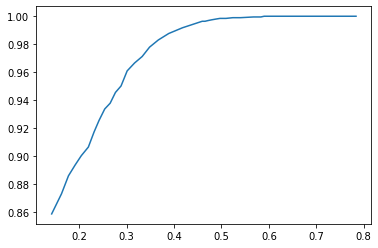

In [214]:

plt.plot(FPR[0:-1],TPR[0:-1])
print(math.exp(gamma))
print(math.exp(gamma)-0.0005)

In [35]:
max(FPR)

0.791407996026819

### Minimum prob of error

In [128]:
#PREDICTION
classify_0 = []
classify_1 = []
ratio_right = Prior_prob[0]/Prior_prob[1]
count = 0

for i in class0_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_0.append(1)
    else:
        classify_0.append(0)
        count +=1
        
for i in class1_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_1.append(1)
    else:
        classify_1.append(0)
        
        
classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
classify = np.vstack((classify_0,classify_1))
print(np.shape(classify))
df_prob = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})

(10000, 1)


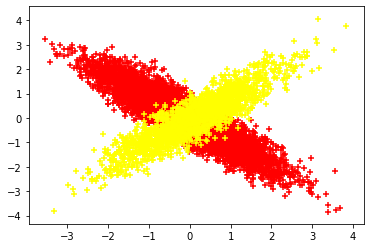

In [129]:
ind00 = np.where((df_prob['label']==0) & (df_prob['classify']==0))
plt.scatter(df_prob.loc[ind00]['x'],df.loc[ind00]['y'], marker='+',color = 'red')
ind10 = np.where((df['label']==0) & (df['classify']==1))
ind01 = np.where((df['label']==1) & (df['classify']==0))
plt.scatter(df.loc[ind01]['x'],df.loc[ind01]['y'], marker='+',color = 'yellow')
plt.scatter(df.loc[ind10]['x'],df.loc[ind10]['y'], marker='+',color = 'blue')
ind11 = np.where((df['label']==1) & (df['classify']==1))
plt.scatter(df.loc[ind11]['x'],df.loc[ind11]['y'], marker='+',color = 'green')
plt.show()

## Naive Bayes

In [190]:
new_cov1 = np.array([[1,0],[0,1]])
new_cov2 = np.array([[1,0],[0,1]])
                    

In [191]:
temp = 1
FPR = []
TPR = []
red = 0.05
#FPR.append(0)
#TPR.append(0)
min_prob_of_error =[]
while (temp>0):
    gamma = math.log(temp)
    print('Gamma:',gamma, 'Temp',temp)
    classify_0_new = []
    classify_1_new = []

    for i in class0_final:
        pred0 = multivariate_normal(i[:,0],2,mean1,new_cov1)
        pred1 = multivariate_normal(i[:,0],2,mean2,new_cov2)
        left_side = math.log(pred1)-math.log(pred0)
        if (left_side >gamma):
            classify_0_new.append(1)
        else:
            classify_0_new.append(0)
        
    for i in class1_final:
        pred0 = multivariate_normal(i[:,0],2,mean1,new_cov1)
        pred1 = multivariate_normal(i[:,0],2,mean2,new_cov2)
        left_side = math.log(pred1)-math.log(pred0)
        if (left_side >gamma):
            classify_1_new.append(1)
        else:
            classify_1_new.append(0)
        
        
    classify_0_new = np.reshape(classify_0_new,(np.shape(classify_0_new)[0],1))
    classify_1_new = np.reshape(classify_1_new,(np.shape(classify_1_new)[0],1))
    classify_new = np.vstack((classify_0_new,classify_1_new))
    
    df_new = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify_new[:,0]})
    
    ind00 = np.where((df_new['label']==0) & (df_new['classify']==0))
    #plt.scatter(df.loc[ind00]['x'],df.loc[ind00]['y'], marker='+',color = 'red')
    ind10 = np.where((df_new['label']==0) & (df_new['classify']==1))
    #plt.scatter(df.loc[ind01]['x'],df.loc[ind01]['y'], marker='+',color = 'yellow')
    ind01 = np.where((df_new['label']==1) & (df_new['classify']==0))
    #plt.scatter(df.loc[ind10]['x'],df.loc[ind10]['y'], marker='+',color = 'blue')
    ind11 = np.where((df_new['label']==1) & (df_new['classify']==1))
    #plt.scatter(df.loc[ind11]['x'],df.loc[ind11]['y'], marker='+',color = 'green')
    
    
    #Setting probabilities
    #p00 = (np.shape(ind00)[1])/(np.shape(class0_final)[0])
    p10 = (np.shape(ind10)[1])/(np.shape(class0_final)[0])
    #p01 = (np.shape(ind01)[1])/(np.shape(class1_final)[0])
    p11 = (np.shape(ind11)[1])/(np.shape(class1_final)[0])
    
    FPR.append(p10)
    TPR.append(p11)
    if temp<red:
        red = red/10
    
    temp -= red
    if temp<0.0000005:
        break
    
    min_prob_of_error.append((p10*Prior_prob[0]) + (p01*Prior_prob[1]))



Gamma: 0.0 Temp 1
Gamma: -0.05129329438755058 Temp 0.95
Gamma: -0.1053605156578264 Temp 0.8999999999999999
Gamma: -0.16251892949777508 Temp 0.8499999999999999
Gamma: -0.22314355131421 Temp 0.7999999999999998
Gamma: -0.28768207245178123 Temp 0.7499999999999998
Gamma: -0.3566749439387328 Temp 0.6999999999999997
Gamma: -0.4307829160924547 Temp 0.6499999999999997
Gamma: -0.5108256237659913 Temp 0.5999999999999996
Gamma: -0.5978370007556212 Temp 0.5499999999999996
Gamma: -0.6931471805599461 Temp 0.4999999999999996
Gamma: -0.7985076962177724 Temp 0.4499999999999996
Gamma: -0.916290731874156 Temp 0.39999999999999963
Gamma: -1.0498221244986787 Temp 0.34999999999999964
Gamma: -1.2039728043259372 Temp 0.29999999999999966
Gamma: -1.386294361119892 Temp 0.24999999999999967
Gamma: -1.609437912434102 Temp 0.19999999999999968
Gamma: -1.8971199848858833 Temp 0.1499999999999997
Gamma: -2.302585092994049 Temp 0.09999999999999969
Gamma: -2.9957322735539975 Temp 0.049999999999999684
Gamma: -3.101092789211

9.999999996859246e-07
-0.0004990000000003141


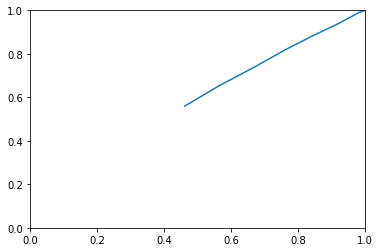

In [153]:
plt.plot(FPR[0:-1],TPR[0:-1])
plt.xlim(0,1)
plt.ylim(0,1)
print(math.exp(gamma))
print(math.exp(gamma)-0.0005)

### Minimum probability of error

In [154]:
#PREDICTION
classify_0 = []
classify_1 = []
ratio_right = Prior_prob[0]/Prior_prob[1]
count = 0

for i in class0_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,new_cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,new_cov1)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_0.append(1)
    else:
        classify_0.append(0)
        count +=1
        
for i in class1_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,new_cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,new_cov1)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_1.append(1)
    else:
        classify_1.append(0)
        
        
classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
classify = np.vstack((classify_0,classify_1))
print(np.shape(classify))
df_prob = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})

(10000, 1)


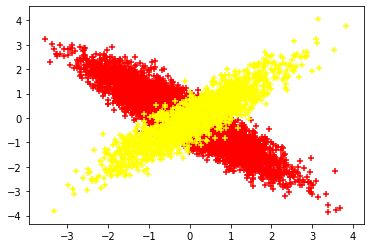

In [155]:
ind00 = np.where((df_prob['label']==0) & (df_prob['classify']==0))
plt.scatter(df_prob.loc[ind00]['x'],df_prob.loc[ind00]['y'], marker='+',color = 'red')
ind10 = np.where((df_prob['label']==0) & (df_prob['classify']==1))
ind01 = np.where((df_prob['label']==1) & (df_prob['classify']==0))
plt.scatter(df_prob.loc[ind01]['x'],df_prob.loc[ind01]['y'], marker='+',color = 'yellow')
plt.scatter(df_prob.loc[ind10]['x'],df_prob.loc[ind10]['y'], marker='+',color = 'blue')
ind11 = np.where((df_prob['label']==1) & (df_prob['classify']==1))
plt.scatter(df_prob.loc[ind11]['x'],df_prob.loc[ind11]['y'], marker='+',color = 'green')
plt.show()

## FisherLDA

In [194]:
mean1hat = np.mean(class0_final[:,:,:],0)
mean2hat = np.mean(class1_final[:,:,:],0)
print(np.shape(mean1hat),np.shape(mean2hat))
print(mean1hat,mean2hat)

(2, 1) (2, 1)
[[-0.08943781]
 [-0.01143309]] [[0.12446295]
 [0.02206107]]


In [195]:
Sw = np.zeros((2,2))

sc_mat = np.zeros((2,2))
print('within-class Scatter Matrix:\n', Sw)
for row in class0_final[:,:,0]:
    row = row.reshape(2,1) 
    sc_mat += (row-mean1hat).dot((row-mean1hat).T)
Sw += sc_mat                            
print('within-class Scatter Matrix:\n', Sw)
sc_mat = np.zeros((2,2))

for row in class0_final[:,:,0]:
    row = row.reshape(2,1) 
    sc_mat += (row-mean1hat).dot((row-mean1hat).T)

Sw += sc_mat                            


print('within-class Scatter Matrix:\n', Sw)


within-class Scatter Matrix:
 [[0. 0.]
 [0. 0.]]
within-class Scatter Matrix:
 [[ 8018.44921543 -7175.86291347]
 [-7175.86291347  7893.93439212]]
within-class Scatter Matrix:
 [[ 16036.89843087 -14351.72582694]
 [-14351.72582694  15787.86878424]]


In [196]:
Sb = np.zeros((2,2))
overall_mean = np.mean(class_final[:,:],0).reshape(2,1)

print(np.shape(overall_mean))

n_class = np.shape(class0_final)[0]

Sb += n_class * (mean1hat-overall_mean).dot((mean1hat-overall_mean).T)

n_class = np.shape(class1_final)[0]

Sb += n_class * (mean2hat-overall_mean).dot((mean2hat-overall_mean).T)



(2, 1)


In [197]:
val, vec = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

for i in range(len(val)):
    vec_sc = vec[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, vec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, val[i].real))



Eigenvector 1: 
[[0.73044732]
 [0.68296904]]
Eigenvalue 1: 3.14e-02

Eigenvector 2: 
[[-0.15470223]
 [ 0.98796114]]
Eigenvalue 2: 0.00e+00


In [198]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(val[i]), vec[:,i]) for i in range(len(val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

for i in range(len(val)):
    vec_sc = vec[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, vec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, val[i].real))

    
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])



Eigenvector 1: 
[[0.73044732]
 [0.68296904]]
Eigenvalue 1: 3.14e-02

Eigenvector 2: 
[[-0.15470223]
 [ 0.98796114]]
Eigenvalue 2: 0.00e+00
Eigenvalues in decreasing order:

0.03140118465575656
0.0


In [199]:
idx = val.argsort()[::-1]   
val = val[idx]
w = vec[:,idx[0]].reshape((2,1))

In [200]:
print(np.shape(w))

(2, 1)


In [201]:
print('Variance explained:\n')
eigv_sum = sum(val)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))


Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%


In [202]:
LDAproj1 = class_final.dot(w)

In [203]:
y0_ax = np.zeros((np.shape(class0_final)[0],1))
y1_ax = np.zeros((np.shape(class1_final)[0],1))

In [204]:
df1 = pd.DataFrame({'x':LDAproj1[:,0], 'label':lable[:,0]})

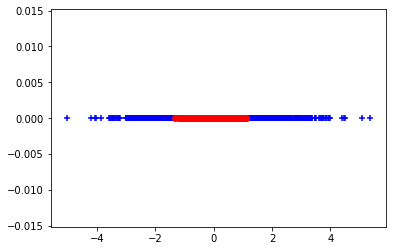

In [205]:
idx0 = np.where((df1['label']==0))
idx1 = np.where((df1['label']==1))
plt.scatter(df1.loc[idx1]['x'],y1_ax[:,0], marker='+',color='blue')
plt.scatter(df1.loc[idx0]['x'],y0_ax[:,0], marker='o',color='red')
plt.plot()
plt.show()

#### Detection

wLDA = sign(mean(yLDA(find(label==1)))-mean(yLDA(find(label==0))))*wLDA; % ensures class1 falls on the + side of the axis
yLDA = sign(mean(yLDA(find(label==1)))-mean(yLDA(find(label==0))))*yLDA; % flip yLDA accordingly

In [206]:
min_proj = min(LDAproj1[:,0])
max_proj = max(LDAproj1[:,0])
Tau = min_proj-10


FPR = []
TPR = []

min_prob_of_error = []

while (Tau<(max_proj+10)):
    
    decide = []
    
    for i in range(np.shape(LDAproj1)[0]):
        if (LDAproj1[i,0] < Tau) :
            decide.append(0)
        else:
            decide.append(1)
            
    decide = np.reshape(decide,(np.shape(LDAproj1)[0],1))
    
    
    
    df_LDA = pd.DataFrame({'x':LDAproj1[:,0],'label':lable[:,0], 'classify':decide[:,0]})
    
    ind00 = np.where((df_LDA['label']==0) & (df_LDA['classify']==0))
    #plt.scatter(df.loc[ind00]['x'],df.loc[ind00]['y'], marker='+',color = 'red')
    ind10 = np.where((df_LDA['label']==0) & (df_LDA['classify']==1))
    #plt.scatter(df.loc[ind01]['x'],df.loc[ind01]['y'], marker='+',color = 'yellow')
    ind01 = np.where((df_LDA['label']==1) & (df_LDA['classify']==0))
    #plt.scatter(df.loc[ind10]['x'],df.loc[ind10]['y'], marker='+',color = 'blue')
    ind11 = np.where((df_LDA['label']==1) & (df_LDA['classify']==1))
    #plt.scatter(df.loc[ind11]['x'],df.loc[ind11]['y'], marker='+',color = 'green')
    
    
    #Setting probabilities
    #p00 = (np.shape(ind00)[1])/(np.shape(class0_final)[0])
    p10 = (np.shape(ind10)[1])/(np.shape(class0_final)[0])
    #p01 = (np.shape(ind01)[1])/(np.shape(class1_final)[0])
    p11 = (np.shape(ind11)[1])/(np.shape(class1_final)[0])
    
    FPR.append(p10)
    TPR.append(p11)

    
    if ((Tau>min_proj) and (Tau<max_proj)):
        red = 0.01
    else:
        red = 0.5
    
    
    Tau += red
    
    min_prob_of_error.append((p10*Prior_prob[0]) + (p01*Prior_prob[1]))
    
    print(Tau)

-14.541383963581442
-14.041383963581442
-13.541383963581442
-13.041383963581442
-12.541383963581442
-12.041383963581442
-11.541383963581442
-11.041383963581442
-10.541383963581442
-10.041383963581442
-9.541383963581442
-9.041383963581442
-8.541383963581442
-8.041383963581442
-7.541383963581442
-7.041383963581442
-6.541383963581442
-6.041383963581442
-5.541383963581442
-5.041383963581442
-4.541383963581442
-4.531383963581442
-4.521383963581442
-4.511383963581443
-4.501383963581443
-4.491383963581443
-4.481383963581443
-4.471383963581443
-4.461383963581444
-4.451383963581444
-4.441383963581444
-4.431383963581444
-4.4213839635814445
-4.411383963581445
-4.401383963581445
-4.391383963581445
-4.381383963581445
-4.3713839635814455
-4.361383963581446
-4.351383963581446
-4.341383963581446
-4.331383963581446
-4.321383963581447
-4.311383963581447
-4.301383963581447
-4.291383963581447
-4.2813839635814475
-4.271383963581448
-4.261383963581448
-4.251383963581448
-4.241383963581448
-4.231383963581448

-0.4713839635814947
-0.4613839635814947
-0.4513839635814947
-0.4413839635814947
-0.43138396358149467
-0.42138396358149466
-0.41138396358149465
-0.40138396358149464
-0.39138396358149463
-0.3813839635814946
-0.3713839635814946
-0.3613839635814946
-0.3513839635814946
-0.3413839635814946
-0.3313839635814946
-0.32138396358149457
-0.31138396358149456
-0.30138396358149455
-0.29138396358149454
-0.28138396358149453
-0.2713839635814945
-0.2613839635814945
-0.2513839635814945
-0.2413839635814945
-0.2313839635814945
-0.22138396358149448
-0.21138396358149447
-0.20138396358149446
-0.19138396358149445
-0.18138396358149445
-0.17138396358149444
-0.16138396358149443
-0.15138396358149442
-0.1413839635814944
-0.1313839635814944
-0.1213839635814944
-0.11138396358149441
-0.10138396358149442
-0.09138396358149442
-0.08138396358149443
-0.07138396358149443
-0.06138396358149443
-0.05138396358149443
-0.041383963581494425
-0.03138396358149442
-0.02138396358149442
-0.01138396358149442
-0.0013839635814944205
0.00861

3.9086160364184663
3.918616036418466
3.928616036418466
3.9386160364184657
3.9486160364184655
3.9586160364184653
3.968616036418465
3.978616036418465
3.9886160364184646
3.9986160364184644
4.008616036418465
4.018616036418464
4.028616036418464
4.038616036418464
4.048616036418464
4.058616036418464
4.068616036418463
4.078616036418463
4.088616036418463
4.098616036418463
4.1086160364184625
4.118616036418462
4.128616036418462
4.138616036418462
4.148616036418462
4.1586160364184614
4.168616036418461
4.178616036418461
4.188616036418461
4.198616036418461
4.20861603641846
4.21861603641846
4.22861603641846
4.23861603641846
4.2486160364184595
4.258616036418459
4.268616036418459
4.278616036418459
4.288616036418459
4.2986160364184585
4.308616036418458
4.318616036418458
4.328616036418458
4.338616036418458
4.348616036418457
4.358616036418457
4.368616036418457
4.378616036418457
4.3886160364184565
4.398616036418456
4.408616036418456
4.418616036418456
4.428616036418456
4.4386160364184555
4.448616036418455
4.

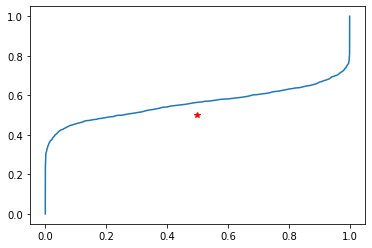

In [178]:
plt.plot(FPR[0:-1],TPR[0:-1])
plt.plot(0.5,0.5,marker='*',color='red')
plt.show()

### Minimum probability of error

In [ ]:
#PREDICTION
classify_0 = []
classify_1 = []
ratio_right = Prior_prob[0]/Prior_prob[1]
count = 0

for i in class0_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_0.append(1)
    else:
        classify_0.append(0)
        count +=1
        
for i in class1_final:
    pred0 = multivariate_normal(i[:,0],2,mean1,cov1)
    pred1 = multivariate_normal(i[:,0],2,mean2,cov2)
    ratio_left = float(pred1/pred0)
    if (ratio_left >ratio_right):
        classify_1.append(1)
    else:
        classify_1.append(0)
        
        
classify_0 = np.reshape(classify_0,(np.shape(classify_0)[0],1))
classify_1 = np.reshape(classify_1,(np.shape(classify_1)[0],1))
classify = np.vstack((classify_0,classify_1))
print(np.shape(classify))
df_prob = pd.DataFrame({'x':class_final[:,0], 'y':class_final[:,1], 'label':lable[:,0], 'classify':classify[:,0]})